In [57]:
import pandas as pd
import numpy as np
import seaborn as sns 
import warnings 
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt

In [58]:
data=pd.read_csv("DataBihourly.csv")

In [59]:
data.head()

,Date,Settlement_Period,Natural_Gas,Oil,Coal,Nuclear,Wind,Pumped_Storage,Hydro,Gas,Other,France_Import,Ireland_Import1,Netherlands_Import,Ireland_Import2,BioMass,Belgium_Import,France1,France2,Norway
0,22-02-2015,1,5293,0,12980,7777,1456,0,681,0,784,1496,0,1002,0,0,0,0,0,0
1,22-02-2015,2,5547,0,12947,7772,1401,0,682,0,784,1496,0,1028,0,0,0,0,0,0
2,22-02-2015,3,5168,0,13314,7779,1604,0,594,0,782,1496,0,982,0,0,0,0,0,0
3,22-02-2015,4,4498,0,13421,7768,1548,0,592,0,781,1496,0,1010,0,0,0,0,0,0
4,22-02-2015,5,4660,0,13304,7778,1351,0,584,0,780,1496,0,1016,0,0,0,0,0,0


In [60]:
data["Date"]=pd.to_datetime(data["Date"])
data = data.drop(columns='Settlement_Period')

In [63]:
data.dtypes

Date                  datetime64[ns]
Natural_Gas                    int64
Oil                            int64
Coal                           int64
Nuclear                        int64
Wind                           int64
Pumped_Storage                 int64
Hydro                          int64
Gas                            int64
Other                          int64
France_Import                  int64
Ireland_Import1                int64
Netherlands_Import             int64
Ireland_Import2                int64
BioMass                        int64
Belgium_Import                 int64
France1                        int64
France2                        int64
Norway                         int64
date_temp             datetime64[ns]
dtype: object

In [62]:
data["date_temp"]=data["Date"]
data = data.groupby("date_temp").sum()

In [67]:
data1 = data.groupby(["Date"], as_index=False)[cols].sum()

In [65]:
cols= data.columns

In [71]:
data.sum()

Natural_Gas           1550328665
Oil                          664
Coal                   277338598
Nuclear                806981374
Wind                   560863275
Pumped_Storage          31551394
Hydro                   52189234
Gas                      1199881
Other                   83714372
France_Import          159863722
Ireland_Import1         10013262
Netherlands_Import      89639052
Ireland_Import2         15226654
BioMass                154053515
Belgium_Import          38511102
France1                   129620
France2                 11435890
Norway                   6477384
dtype: int64

In [73]:
data1.head()

,Date,Natural_Gas,Oil,Coal,Nuclear,Wind,Pumped_Storage,Hydro,Gas,Other,France_Import,Ireland_Import1,Netherlands_Import,Ireland_Import2,BioMass,Belgium_Import,France1,France2,Norway
0,2015-01-03,203543,0,470740,352658,257429,14110,29008,0,53305,88400,3336,43386,4292,0,0,0,0,0
1,2015-01-04,393550,0,537032,320761,250741,14328,32989,0,54722,44944,842,46758,1770,0,0,0,0,0
2,2015-01-05,531211,0,458593,334293,47697,11372,14701,0,41986,95668,2464,46484,1558,0,0,0,0,0
3,2015-01-06,408758,0,262266,350799,218848,12828,17654,0,26438,89716,7248,41202,3968,0,0,0,0,0
4,2015-01-07,486103,0,370286,367695,129639,15460,14523,183,34614,92264,426,45178,166,0,0,0,0,0


In [91]:
data1.columns

Index(['Date', 'Natural_Gas', 'Oil', 'Coal', 'Nuclear', 'Wind',
       'Pumped_Storage', 'Hydro', 'Gas ', 'Other', 'France_Import',
       'Ireland_Import1', 'Netherlands_Import', 'Ireland_Import2', 'BioMass',
       'Belgium_Import', 'France1', 'France2', 'Norway'],
      dtype='object')

In [92]:
df = pd.DataFrame().assign(Date=data1['Date'],
     Non_Renewable= (data1['Natural_Gas']+data1['Oil']+data1['Coal']+data1['Gas ']+data1['BioMass']),
     Renewable =(data1['Wind']+data1['Pumped_Storage']+data1['Hydro']),
     Other =(data1['Other']),
     Nuclear = data1['Nuclear'])
     

In [108]:
df['Import']= (data1.iloc[:,10]+data1.iloc[:,11]+data1.iloc[:,12]+data1.iloc[:,13]+data1.iloc[:,15]+data1.iloc[:,16]++data1.iloc[:,17]+data1.iloc[:,18])

In [111]:
df.head()

,Date,Non_Renewable,Renewable,Other,Nuclear,Import
0,2015-01-03,674283,300547,53305,352658,139414
1,2015-01-04,930582,298058,54722,320761,94314
2,2015-01-05,989804,73770,41986,334293,146174
3,2015-01-06,671024,249330,26438,350799,142134
4,2015-01-07,856572,159622,34614,367695,138034


<AxesSubplot:xlabel='Date', ylabel='Import'>

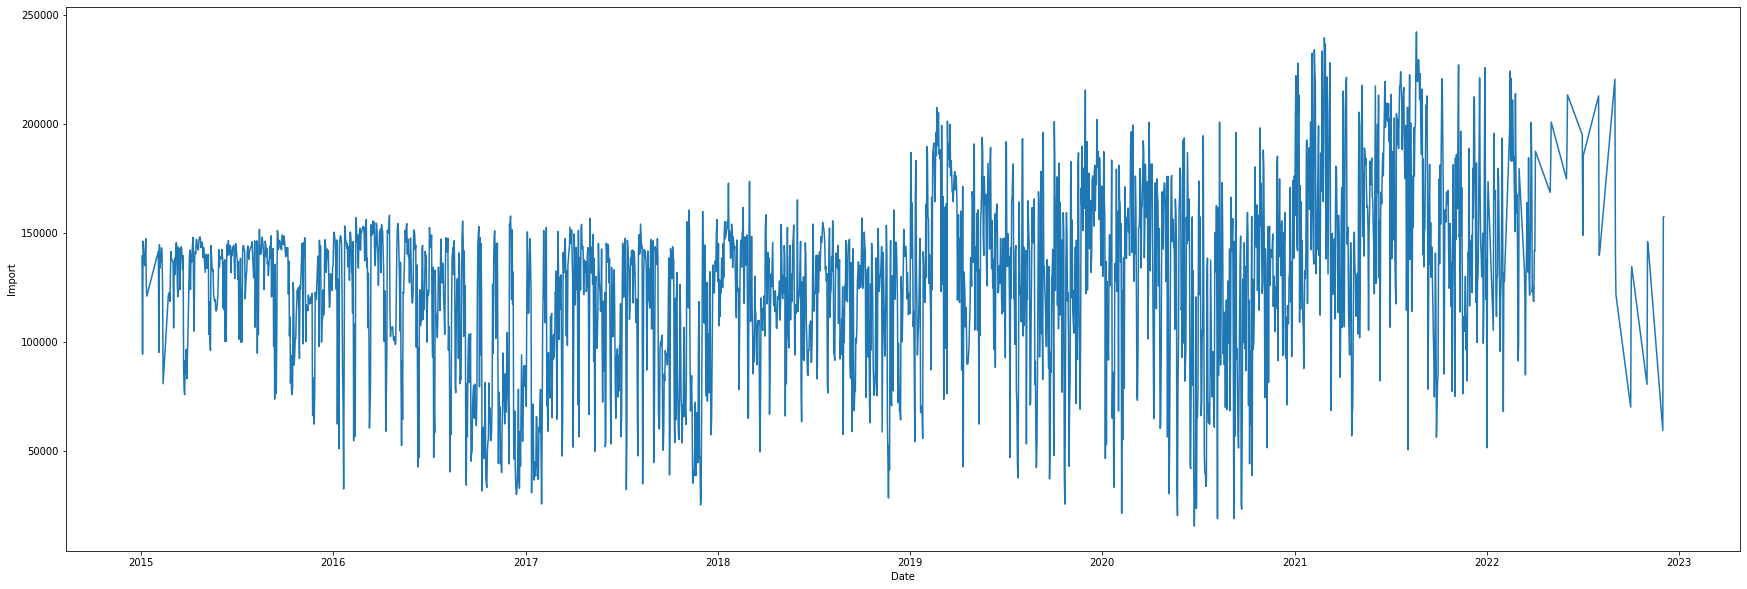

In [112]:
plt.rcParams["figure.figsize"] = (30,10)
sns.lineplot(data=df, x="Date", y="Import")